In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import re
import itertools

In [2]:
def calculate_avg_values(d):
    def sum_list(x):
        vs = list(filter(None, x))
        return sum(vs) / len(vs)


    avg_values = list(map(lambda x: x.values(), d.values()))
    avg_values = list(map(list, avg_values))
    avg_values = itertools.zip_longest(*avg_values)
    avg_values = list(map(list, avg_values))
    avg_values = list(map(sum_list, avg_values))
    avg_values = dict(zip(d[50].keys(), avg_values))
    return avg_values

In [3]:
hierarchical_src = 'results/kMeansAgglomerative/clustering/'

In [4]:
initial_clusters_pattern = '(?<=initialClusters)\d+(?=_)'
final_clusters_pattern = '(?<=finalClusters)\d+(?=_)'

hierachical_slht = {}
hierachical_wsse = {}
for d in os.listdir(hierarchical_src):
    if not d.endswith('.png'):
        init_clust_match = int(re.search(initial_clusters_pattern, d).group())
        final_clust_match = int(re.search(final_clusters_pattern, d).group())
        if init_clust_match not in hierachical_slht:
            hierachical_slht[init_clust_match] = {}
            hierachical_wsse[init_clust_match] = {}
        scores = pd.read_csv(hierarchical_src + d + '/scores.csv')
        hierachical_slht[init_clust_match][final_clust_match] = scores[scores['score'] == 'silhouette score']['value'].item()
        hierachical_wsse[init_clust_match][final_clust_match] = scores[scores['score'] == 'sum of squares within']['value'].item()

hierachical_slht = dict(sorted(hierachical_slht.items()))
hierachical_wsse = dict(sorted(hierachical_wsse.items()))

for slth_item, wsse_item in zip(hierachical_slht.items(), hierachical_wsse.items()):
    hierachical_slht[slth_item[0]] = dict(sorted(slth_item[1].items()))
    hierachical_wsse[wsse_item[0]] = dict(sorted(wsse_item[1].items()))

In [5]:
cure_src = 'results/noOutliers/clustering/clusters/'

In [6]:
pattern = '(?<=clusters)\d+(?=_)'

cure_slht = {}
cure_wsse = {}
for d in os.listdir(cure_src):
    if d.endswith('_1'):
        match = int(re.search(pattern, d).group())
        scores = pd.read_csv(cure_src + d + '/scores.csv')
        cure_slht[match] = scores[scores['score'] == 'silhouette score']['value'].item()
        cure_wsse[match] = scores[scores['score'] == 'sum of squares within']['value'].item()

cure_slht = dict(sorted(cure_slht.items()))
cure_wsse = dict(sorted(cure_wsse.items()))

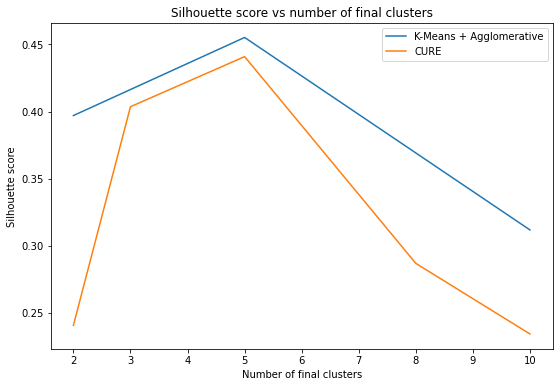

In [20]:
avg_hierarchical_slht_values = calculate_avg_values(hierachical_slht)

plt.figure(figsize=(9,6))
plt.title("Silhouette score vs number of final clusters")
plt.xlabel("Number of final clusters")
plt.ylabel("Silhouette score")
legend_labels = ['K-Means + Agglomerative', 'CURE']
plt.plot(avg_hierarchical_slht_values.keys(), avg_hierarchical_slht_values.values())
plt.plot(cure_slht.keys(), cure_slht.values())
plt.legend(legend_labels)
plt.show()

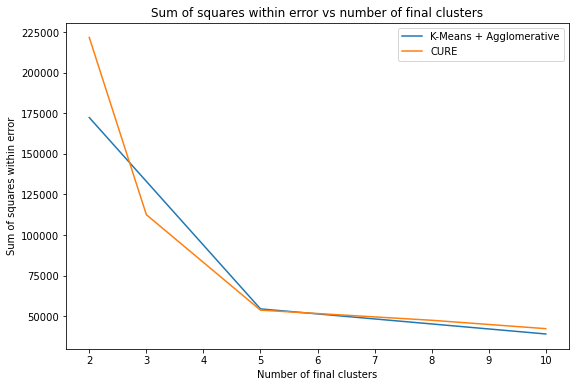

In [21]:
avg_hierarchical_wsse_values = calculate_avg_values(hierachical_wsse)

plt.figure(figsize=(9,6))
plt.title("Sum of squares within error vs number of final clusters")
plt.xlabel("Number of final clusters")
plt.ylabel("Sum of squares within error")
legend_labels = ['K-Means + Agglomerative', 'CURE']
plt.plot(avg_hierarchical_wsse_values.keys(), avg_hierarchical_wsse_values.values())
plt.plot(cure_wsse.keys(), cure_wsse.values())
plt.legend(legend_labels)
plt.show()